# PRE-PROCESSING OF AUDIO DATA

## ABSTRACT

This research paper analyzes audio pre-processing techniques that are critical for various applications such as source separation, speech recognition, and musical information retrieval. The paper covers creating a topological map of audio sources over time lag using techniques like speech recognition, noise reduction techniques like spectral subtraction, Wiener filtering, and adaptive filtering, reducing channel distortions such as echo cancellation and equalization, and approaches for detecting vocal activity to distinguish speech from background noise. Additionally, the paper assesses the impact of various audio pre-processing techniques on source separation performance using a dataset of mixed audio signals. Overall, this study provides a comprehensive overview of audio pre-processing techniques that can improve audio signal quality and source separation accuracy.

# TABLE OF CONTENT


*  Importing Libraries
*  Loading a data file
*  Spectogram
*  Creating an Audio Signal
*  Spectral Rolloff 
*  Spectral Bandwidth
*  Zero Crossing Rate
*  MFCC
*  Chroma Frequencies


## IMPORTING LIBRARIES

## **LIBROSA**
Librosa is a Python module, it is a tool that can be used to analyze audio signals with a specific focus on music. It provides the necessary components to create a music information retrieval system. The software is well-documented, and it offers numerous examples and tutorials to assist users in utilizing its capabilities effectively.

In [1]:
!pip install librosa

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Loading an Audio File

In [2]:
from google.colab import files 
uploaded = files.upload()

Saving 6ab74e177aa149468a39ca10beed6222.mp3 to 6ab74e177aa149468a39ca10beed6222.mp3
Saving 07ab324c602e4afab65ddbcc746c31b5.mp3 to 07ab324c602e4afab65ddbcc746c31b5.mp3
Saving 9cc5d9646f344f1bbb52640a988fe902.mp3 to 9cc5d9646f344f1bbb52640a988fe902.mp3
Saving 41e6fe6504a34bf6846938ba78d13df1.mp3 to 41e6fe6504a34bf6846938ba78d13df1.mp3
Saving 99af324c881246949408c0b1ae54271f.mp3 to 99af324c881246949408c0b1ae54271f.mp3
Saving 856b194b097441958697c2bcd1f63982.mp3 to 856b194b097441958697c2bcd1f63982.mp3
Saving 940d546e5eb745c9a74bce3f35efa1f9.mp3 to 940d546e5eb745c9a74bce3f35efa1f9.mp3
Saving 8680a8dd845d40f296246dbed0d37394.mp3 to 8680a8dd845d40f296246dbed0d37394.mp3
Saving 899616723a32409c996f6f3441646c2a.mp3 to 899616723a32409c996f6f3441646c2a.mp3
Saving 96779836288745728306903d54e264dd.mp3 to 96779836288745728306903d54e264dd.mp3
Saving a56e20a518684688a9952add8a9d5213.mp3 to a56e20a518684688a9952add8a9d5213.mp3
Saving b2fd3f01e9284293a1e33f9c811a2ed6.mp3 to b2fd3f01e9284293a1e33f9c811a2

In [3]:
audio_data='/content/07ab324c602e4afab65ddbcc746c31b5.mp3'

In [4]:
import librosa
x,sr = librosa.load(audio_data)
print(type(x), type(sr))
print(x.shape, sr)

<class 'numpy.ndarray'> <class 'int'>
(578880,) 22050


This function returns an audio time series as a numpy array with a sample rate (sr) of 22KHZ mono as the default. This behavior can be changed by resampling at 44.1KHz.

In [5]:
librosa.load(audio_data, sr=44100)

(array([ 0.000000e+00, -8.665523e-12, -6.104039e-12, ...,  0.000000e+00,
         0.000000e+00,  0.000000e+00], dtype=float32), 44100)

**PLAYING AUDIO:**

Using,IPython.display. Audio you can play the audio in your google collab notebook.

In [6]:
import IPython.display as ipd
ipd.Audio(audio_data)

**VISUALIZING AUDIO:**

We can plot the audio array using librosa.display.waveplot:

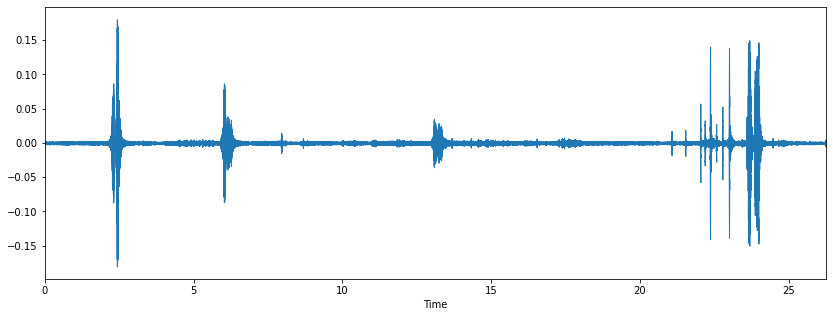

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

## SPECTROGRAM

To visually display the energy levels of a signal at different frequencies over time, a spectrogram is used. It demonstrates the variations in energy levels over time as well as the relative strength of the frequencies present in a waveform.
A spectrogram is a visual representation of the signal strength, or "loudness," of a signal across time at different frequencies contained in a specific waveform. One can see not only if there is more or less energy at, say, 2 Hz vs 10 Hz, but also how energy levels change over time.
Spectrograms are commonly represented as heat maps, which employ color or brightness to show the strength of the signal.

librosa.display.specshow can be used to display a spectrogram.

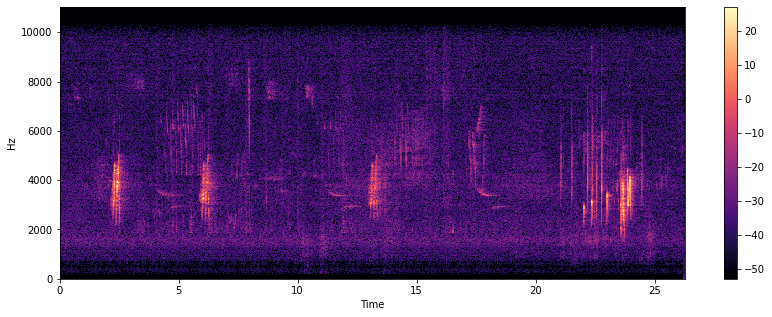

In [8]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

The function .stft() transforms data into a short term Fourier transform, which allows us to determine the amplitude of a given frequency at a specific time. By utilizing STFT, we can identify the amplitude of multiple frequencies that are present in an audio signal at a specific time. 
To display a spectrogram, we use the .specshow function. The frequency axis is represented on the vertical axis, ranging from 0 to 10kHz, while the time of the audio clip is shown on the horizontal axis.
When all the activity appears to be taking place at the bottom of the spectrum, we can change the frequency axis to a logarithmic one.

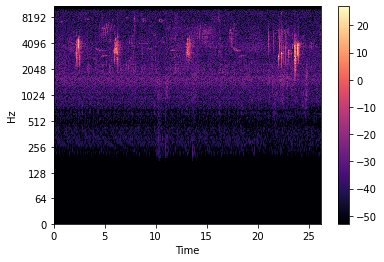

In [9]:
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

## CREATE AN AUDIO SIGNAL

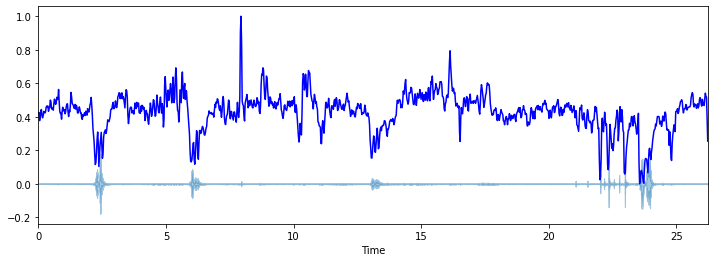

In [10]:
import sklearn
spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]
spectral_centroids.shape
# Computing the time variable for visualization
plt.figure(figsize=(12, 4))
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)
# Normalising the spectral centroid for visualisation
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)
#Plotting the Spectral Centroid along the waveform
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='b')

The .spectral centroid function will produce an array with columns equal to the number of frames in your sample.

## SPECTRAL ROLLOFF

The spectral rolloff is a parameter that describes the characteristics of a signal's shape. It indicates the frequency at which the high frequencies start to diminish and eventually reach zero. 
In order to compute the spectral rolloff, it is necessary to determine the proportion of bins in the power spectrum where 85% of its power is concentrated at lower frequencies. 

The librosa.feature.spectral_rolloff function is used to calculate the rolloff frequency for every frame within an audio signal.

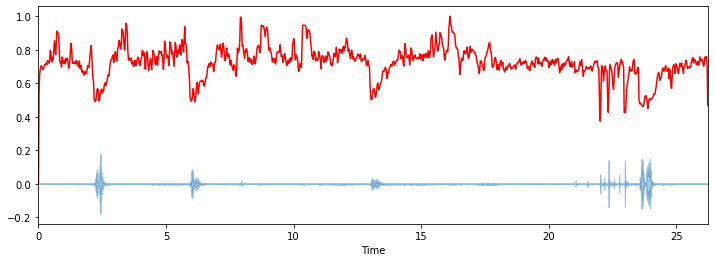

In [11]:
spectral_rolloff = librosa.feature.spectral_rolloff(x+0.01, sr=sr)[0]
plt.figure(figsize=(12, 4))
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r')

## SPECTRAL BANDWIDTH

Spectral bandwidth is a measure of the range of frequencies present in a signal. It refers to the width of the frequency band at the half of the peak amplitude or the full width at half maximum (FWHM). The two red lines and λSB on the wavelength axis represent the spectral bandwidth.

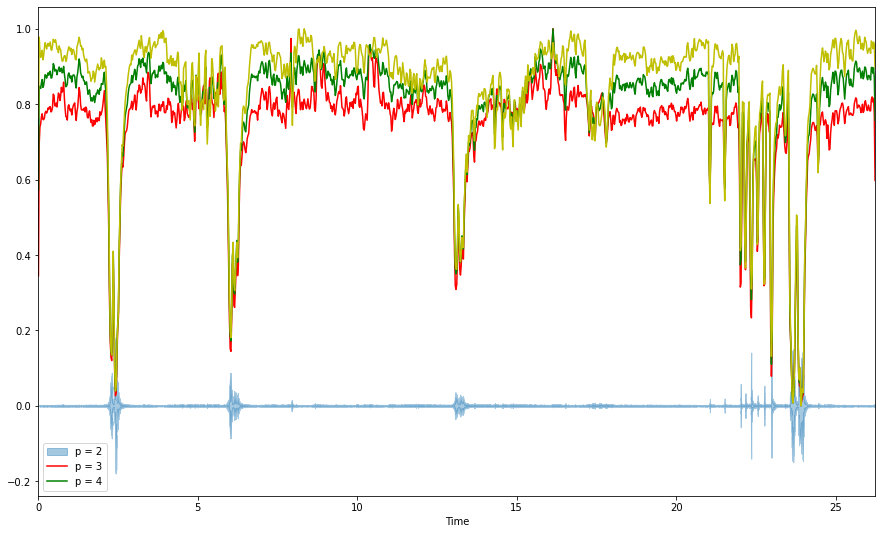

In [12]:
spectral_bandwidth_2 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr)[0]
spectral_bandwidth_3 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr, p=3)[0]
spectral_bandwidth_4 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr, p=4)[0]
plt.figure(figsize=(15, 9))
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_bandwidth_2), color='r')
plt.plot(t, normalize(spectral_bandwidth_3), color='g')
plt.plot(t, normalize(spectral_bandwidth_4), color='y')
plt.legend(('p = 2', 'p = 3', 'p = 4'))

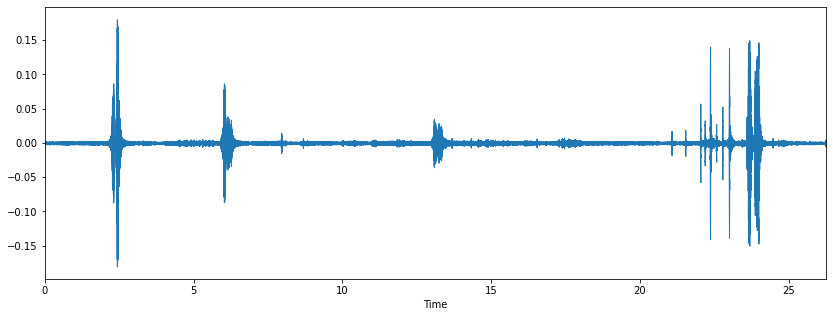

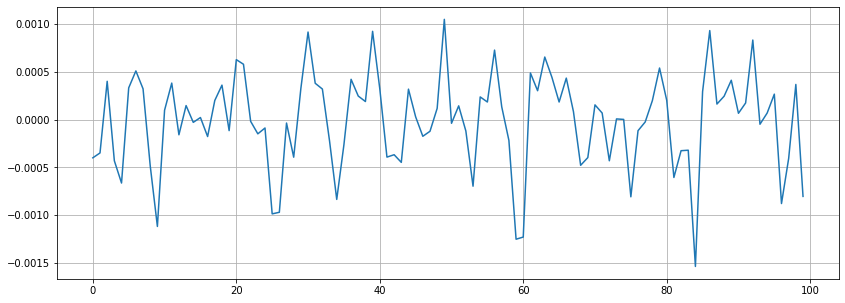

In [13]:
x, sr = librosa.load(audio_data)
#Plot the signal:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)
# Zooming in
n0 = 9000
n1 = 9100
plt.figure(figsize=(14, 5))
plt.plot(x[n0:n1])
plt.grid()

## ZERO-CROSSINGS

The term refers to the speed at which a signal transitions from a positive value to zero, then to a negative value, or from a negative value to zero, and then to a positive value.

In [14]:
zero_crossings = librosa.zero_crossings(x[n0:n1], pad=False)
print(sum(zero_crossings))

40


## Mel-Frequency Cepstral Coefficients(MFCCs)

Mel-frequency cepstral coefficients (MFCC), which have 39 characteristics.The MFCC feature extraction approach consists of windowing the signal, performing the DFT(Discrete Fourier transform), calculating the log of the magnitude, and then warping the frequencies on a Mel scale prior to actually performing the inverse DCT(Discrete Cosine Transform).


(20, 1131)


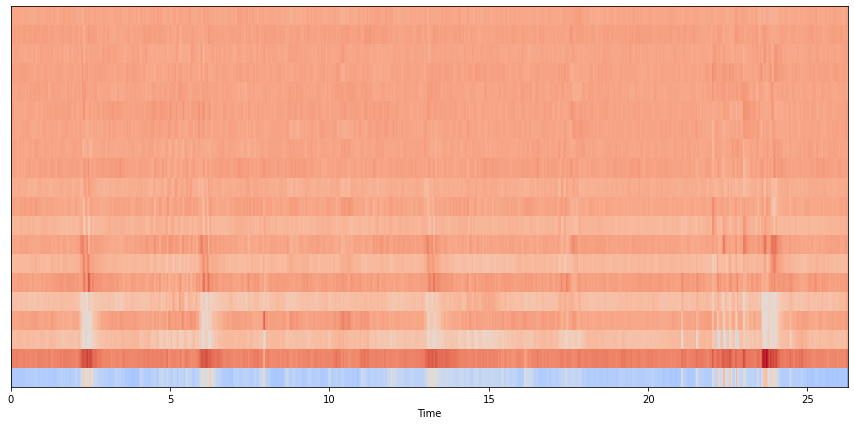

In [17]:
fs=10
mfccs = librosa.feature.mfcc(x, sr=fs)
print(mfccs.shape)
(20, 97)
#Displaying  the MFCCs:
plt.figure(figsize=(15, 7))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

## CHROMA FEATURE

It is an effective method for analyzing music where pitch can be adequately categorized (generally into twelve categories) and whose intonation approximates the equitable scale.

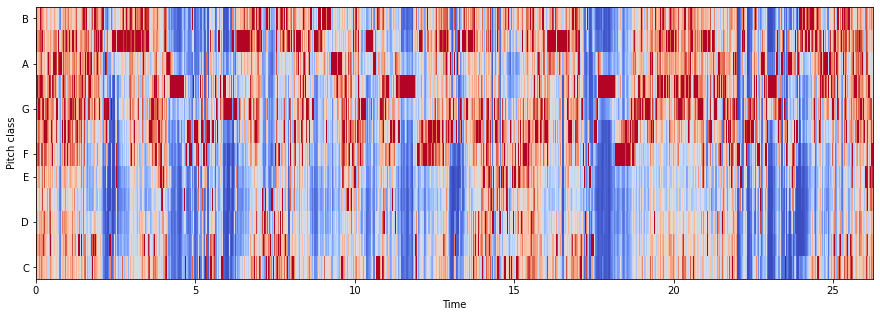

In [16]:
hop_length=12
chromagram = librosa.feature.chroma_stft(x, sr=sr, hop_length=hop_length)
plt.figure(figsize=(15, 5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')

## CONCLUSION

In this research paper, we explore various pre-processing techniques for audio data that are important for applications such as source separation, speech recognition, and musical information retrieval. We discuss techniques for reducing noise and channel distortions, detecting vocal activity to distinguish speech from background noise, and improving source separation accuracy. We also demonstrate how to apply these techniques using the Librosa Python module, which is specifically designed for analyzing audio signals. The paper provides a comprehensive overview of audio pre-processing techniques that can help improve audio signal quality and source separation accuracy.

## REFERENCES

Librosa: https://librosa.org/doc/latest/index.html 


## License

All code in this notebook is available as open source through the MIT license.

All text and images are free to use under the Creative Commons Attribution 3.0 license. https://creativecommons.org/licenses/by/3.0/us/

These licenses let people distribute, remix, tweak, and build upon the work, even commercially, as long as they give credit for the original creation.

Copyright 2023 AI Skunks https://github.com/aiskunks

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.